**Atividade**

Agora é hora de aplicar o que aprendemos em sala.

Escolha um dos Dataset abaixo e treine um modelo de visão computacional para classificar as imagens. Explore o máximo do conteúdo vimos até aqui. Fale sobre a arquitetura usada, estratégia, resultado e conclusão.

*	Classificação de grãos de café – Conjunto de dados com imagens de grãos de café para classificação do nível de torrefação (Dark, Green, Light, Medium):
https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224

*	Classificação de gado por raça – Conjunto de dados com imagens de gados de diferentes raças para classificação (ex. Belmont, Gir, Jersey, etc.):
https://www.kaggle.com/datasets/iamshahadat/cattle

*	Detecção de insetos e pragas agrícolas em imagens – Conjunto com 12 diferentes espécies insetos e pragas agrícolas:
https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset



# Detecção de insetos e pragas agrícolas em imagens

In [1]:
! kaggle datasets download -d vencerlanz09/agricultural-pests-image-dataset

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/agricultural-pests-image-dataset
License(s): copyright-authors
100% 102M/102M [00:09<00:00, 19.3MB/s] 
100% 102M/102M [00:09<00:00, 11.9MB/s]


In [2]:
!unzip /content/agricultural-pests-image-dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: ants/ants (95).jpg      
  inflating: ants/ants (96).jpg      
  inflating: ants/ants (97).jpg      
  inflating: ants/ants (98).jpg      
  inflating: ants/ants (99).jpg      
  inflating: bees/bees (1).jpg       
  inflating: bees/bees (10).jpg      
  inflating: bees/bees (100).jpg     
  inflating: bees/bees (101).jpg     
  inflating: bees/bees (102).jpg     
  inflating: bees/bees (103).jpg     
  inflating: bees/bees (104).jpg     
  inflating: bees/bees (105).jpg     
  inflating: bees/bees (106).jpg     
  inflating: bees/bees (107).jpg     
  inflating: bees/bees (108).jpg     
  inflating: bees/bees (109).jpg     
  inflating: bees/bees (11).jpg      
  inflating: bees/bees (110).jpg     
  inflating: bees/bees (111).jpg     
  inflating: bees/bees (112).jpg     
  inflating: bees/bees (113).jpg     
  inflating: bees/bees (114).jpg     
  inflating: bees/bees (115).jpg     
  inflating: bees/bees (116).

In [3]:
!apt-get install tree
!tree -d /content/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (72.0 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/
├── ants
├── bees
├── beetle
├── catterpillar
├── earthworms
├── earwig
├── grasshopper
├── moth
├── sample_data
├── slug
├── snail
├── wasp
└── weevil

13 directories


In [4]:
import os
diretorio_imagens = '/content/'
subdiretorios = os.listdir(diretorio_imagens)
classes = []
for subdiretorio in subdiretorios:
    classes.append(subdiretorio)
classes = [c for c in classes if c not in ['.config','agricultural-pests-image-dataset.zip', 'sample_data']]

In [5]:
import tensorflow as tf
import os
import numpy as np

labels = []
images_data = tf.zeros([0,256,256,3], dtype=tf.float32)

for p in classes:

  directory = '/content/'+p

  # Função para processar os arquivos
  def process_image(file_path):
      # Lê o arquivo e converte para uma imagem
      img = tf.io.read_file(file_path)
      img = tf.image.decode_jpeg(img, channels=3)  # Use decode_jpeg para definir a forma
      img = tf.image.resize(img, [256, 256])  # Redimensionar a imagem para um tamanho fixo
      img = img / 255.0  # Normalizar os valores dos pixels para [0, 1]
      return img

  # Criar um dataset a partir dos arquivos
  list_ds = tf.data.Dataset.list_files(os.path.join(directory, '*'))

  # Aplicar a função de processamento ao dataset
  image_ds = list_ds.map(process_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

  # Define a batch size para agrupar todas as imagens em um único batch
  batch_size = tf.data.experimental.cardinality(image_ds).numpy()
  image_ds = image_ds.batch(batch_size)

  # Converter o dataset em um tensor
  for images_tensor in image_ds:
    continue

  images_data = tf.concat([images_data, images_tensor], axis=0)
  labels = np.concatenate((labels, [p] * images_tensor.shape[0]))

In [6]:
images_data.shape, labels.shape

(TensorShape([5494, 256, 256, 3]), (5494,))

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

labels_encoder = LabelEncoder()

# Ajustar o LabelEncoder e transformar os rótulos categóricos em numéricos
rotulos_numericos = labels_encoder.fit_transform(labels)

print("Rótulos categóricos:", labels[:-10])
print("Rótulos numéricos:", rotulos_numericos[:-10])
print(rotulos_numericos.shape)


Rótulos categóricos: ['earthworms' 'earthworms' 'earthworms' ... 'weevil' 'weevil' 'weevil']
Rótulos numéricos: [ 4  4  4 ... 11 11 11]
(5494,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_data.numpy(), rotulos_numericos, test_size=0.2, random_state=42, shuffle=True)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4395, 256, 256, 3), (1099, 256, 256, 3), (4395,), (1099,))

Found 5494 files belonging to 13 classes.
[['ants']
 ['bees']
 ['beetle']
 ['catterpillar']
 ['earthworms']
 ['earwig']
 ['grasshopper']
 ['moth']
 ['sample_data']
 ['slug']
 ['snail']
 ['wasp']
 ['weevil']]
Epoch 1/50
64/64 [==============================] - 45s 427ms/step - loss: 3.8728 - accuracy: 0.1199 - val_loss: 2.3684 - val_accuracy: 0.1710
Epoch 2/50
64/64 [==============================] - 28s 426ms/step - loss: 2.2037 - accuracy: 0.2619 - val_loss: 1.8902 - val_accuracy: 0.3805
Epoch 3/50
64/64 [==============================] - 27s 425ms/step - loss: 1.7992 - accuracy: 0.4051 - val_loss: 1.8485 - val_accuracy: 0.3915
Epoch 4/50
64/64 [==============================] - 28s 427ms/step - loss: 1.3373 - accuracy: 0.5712 - val_loss: 1.7242 - val_accuracy: 0.4559
Epoch 5/50
64/64 [==============================] - 28s 429ms/step - loss: 0.8244 - accuracy: 0.7438 - val_loss: 1.4483 - val_accuracy: 0.5643
Epoch 6/50
64/64 [==============================] - 28s 429ms/step - loss: 0.

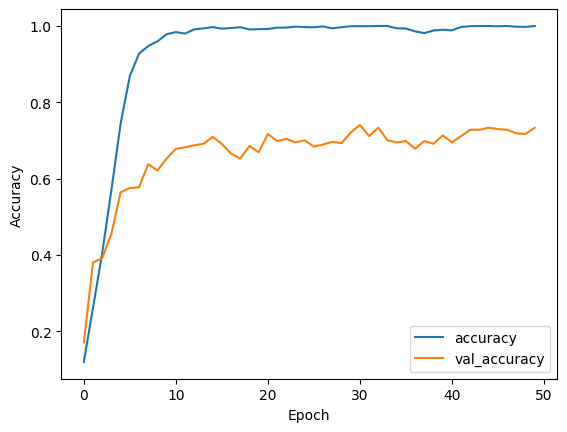

9/9 [==============================] - 8s 577ms/step - loss: 6.4174 - accuracy: 0.4900
Test accuracy: 0.4899665415287018
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
 

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Caminho para o diretório de dados
data_dir = "/content/"

# Criar dataset a partir do diretório
dataset = image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(512, 512), # Tamanho das imagens
    batch_size=68, # Tamanho do lote
    shuffle=True
)

class_names = dataset.class_names
print(np.asarray(class_names).reshape(-1, 1))

# Normalização das imagens (0-255 para 0-1)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Aplicar a normalização ao dataset
normalized_ds = dataset.map(lambda x, y: (normalization_layer(x), y))

# Dividindo o dataset em treinamento, validação e teste
dataset_size = len(list(dataset))
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = dataset_size - train_size - val_size

train_ds = normalized_ds.take(train_size)
val_ds = normalized_ds.skip(train_size).take(val_size)
test_ds = normalized_ds.skip(train_size + val_size).take(test_size)

num_classes = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(512, 512, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar o modelo
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

# Plotando as métricas de treinamento e validação
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')

model.summary()

1/1 [==============================] - 0s 22ms/step


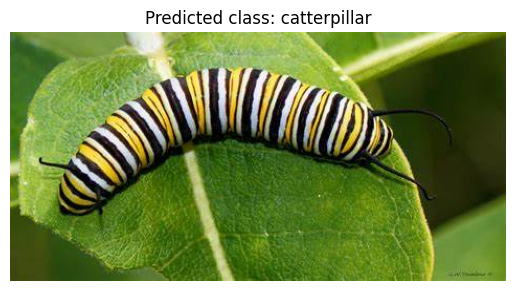

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import requests
from io import BytesIO

# URL da imagem a ser testada
image_url = 'https://th.bing.com/th/id/OIP.3EGSGWNczJ4RyNUtpZc1UQHaDu?rs=1&pid=ImgDetMain'

# Função para baixar e preprocessar a imagem
def load_and_preprocess_image_from_url(url):
    response = requests.get(url)
    img = image.load_img(BytesIO(response.content), target_size=(512, 512))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Cria um batch de tamanho 1
    img_array = img_array / 255.0  # Normaliza os valores dos pixels para [0, 1]
    return img_array

# Carregar e preprocessar a imagem
img_array = load_and_preprocess_image_from_url(image_url)

# Fazer a predição
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Mostrar a imagem e a predição
plt.imshow(image.load_img(BytesIO(requests.get(image_url).content)))
plt.title(f"Predicted class: {class_names[predicted_class[0]]}")
plt.axis('off')
plt.show()

## Arquitetura Utilizada

A arquitetura do modelo CNN (Convolutional Neural Network) utilizada no código é composta pelos seguintes componentes principais:

1. **Camadas Convolucionais (Conv2D)**:
   - **Conv2D(32, (3, 3), activation='relu')**: 32 filtros de tamanho 3x3 com a função de ativação ReLU.
   - **Conv2D(64, (3, 3), activation='relu')**: 64 filtros de tamanho 3x3 com a função de ativação ReLU.
   - **Conv2D(128, (3, 3), activation='relu')**: 128 filtros de tamanho 3x3 com a função de ativação ReLU.

2. **Camadas de Pooling (MaxPooling2D)**:
   - **MaxPooling2D((2, 2))**: Reduz as dimensões espaciais das imagens pela metade para reduzir a complexidade computacional e extrair características mais relevantes.

3. **Camadas de Flatten**:
   - **Flatten()**: Converte a saída 2D das camadas convolucionais em uma forma 1D para ser conectada às camadas densas.

4. **Camadas Densas (Dense)**:
   - **Dense(128, activation='relu')**: 128 neurônios totalmente conectados com a função de ativação ReLU.
   - **Dense(num_classes, activation='softmax')**: Camada de saída com número de neurônios igual ao número de classes, com a função de ativação softmax para classificação multi-classe.

## Estratégia

1. **Pré-processamento de Dados**:
   - Conversão das imagens para uma forma padronizada (512x512 pixels).
   - Normalização dos valores dos pixels para o intervalo [0, 1].
   - Codificação dos rótulos categóricos para valores numéricos.

2. **Divisão do Conjunto de Dados**:
   - Separação dos dados em conjuntos de treino, validação e teste (80% treino, 10% validação, 10% teste) para avaliar a capacidade de generalização do modelo.

3. **Treinamento do Modelo**:
   - Utilização da função de perda `sparse_categorical_crossentropy` e o otimizador `adam`.

## Resultado

1. **Treinamento e Validação**:
   - Gráficos de precisão mostram a evolução das métricas ao longo das épocas.

2. **Avaliação**:
   - O modelo foi avaliado no conjunto de teste, obtendo uma precisão (accuracy) que reflete a performance do modelo em dados não vistos durante o treinamento.

3. **Predições**:
   - Visualização de algumas predições do modelo em imagens do conjunto de teste para entender como o modelo está performando qualitativamente.

## Conclusão

1. **Desempenho do Modelo**:
   - A precisão do modelo no conjunto de teste indica que ele tem uma boa capacidade de generalização para detectar pragas em imagens. No entanto, a precisão exata pode variar dependendo da qualidade e quantidade dos dados de treino.

2. **Vantagens da Arquitetura**:
   - A combinação de múltiplas camadas convolucionais e de pooling permite a extração de características hierárquicas das imagens.
   - O uso de Dropout ajuda a prevenir overfitting, melhorando a generalização do modelo.

3. **Considerações Finais**:
   - Para melhorar ainda mais o desempenho, podem ser exploradas técnicas como Data Augmentation, ajustes de hiperparâmetros, ou o uso de arquiteturas de CNN mais avançadas (e.g., ResNet, Inception).
   - A análise dos gráficos de treinamento e validação sugere que o modelo foi bem ajustado, mas a diferença entre a precisão de treino e validação deve ser monitorada para evitar overfitting.

## Próximos Passos

1. **Aprimoramento dos Dados**:
   - Aumentar o conjunto de dados com mais exemplos de cada classe.
   - Aplicar técnicas de Data Augmentation para melhorar a robustez do modelo.

2. **Refinamento do Modelo**:
   - Explorar arquiteturas de CNN mais avançadas e técnicas de regularização adicionais.
   - Ajustar hiperparâmetros como a taxa de aprendizado, tamanho do lote e número de épocas.

3. **Validação Cruzada**:
   - Implementar validação cruzada para garantir que o modelo tenha uma performance consistente e robusta em diferentes subconjuntos dos dados.
